1. Importing Required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


Purpose: Import tools for data loading, visualization, preprocessing, modeling, and evaluation.

2. Load the Dataset

In [17]:
df = pd.read_csv("telecom.csv")
df.head()


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Goal: Load the dataset to understand the structure and preview the data.

3. Initial Data Exploration

info() → Shows data types and non-null entries.
describe() → Summary stats (mean, std, etc.).
isnull() → Detects missing values.

In [18]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

4. Data Preprocessing

In [19]:
# Convert 'international_plan' and 'voice_mail_plan' from 'yes/no' or 0/1 if needed
df['international_plan'] = df['international_plan'].astype(str)
df['voice_mail_plan'] = df['voice_mail_plan'].astype(str)

le = LabelEncoder()
df['international_plan'] = le.fit_transform(df['international_plan'])
df['voice_mail_plan'] = le.fit_transform(df['voice_mail_plan'])


Converts categorical columns (yes/no) to numeric (0/1) using Label Encoding.
yes → 1, no → 0

In [20]:
df = df.drop(columns=['Unnamed: 0'])  # Index column not useful
#Removes unnecessary index column from the dataset.

5. Data Visualization
🔸 Correlation Heatmap

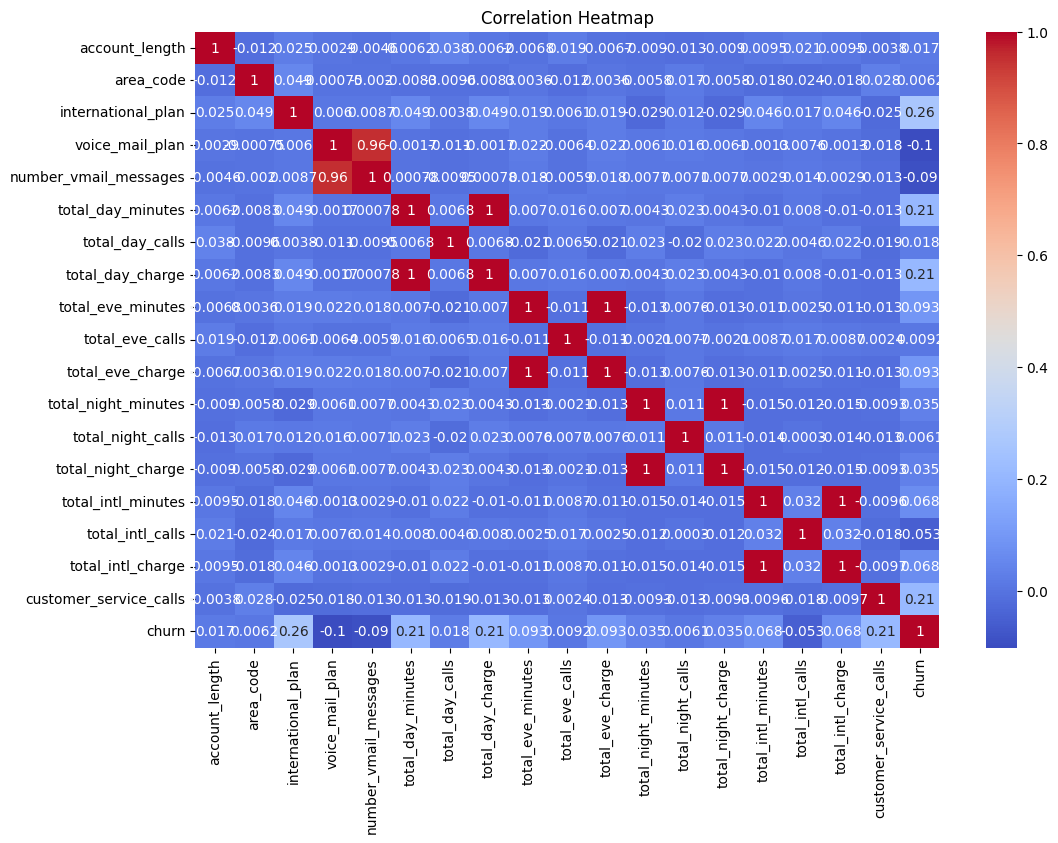

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Visualizes correlation between features.
Helps detect multicollinearity and important predictors of churn.

🔸 Target Class Distribution

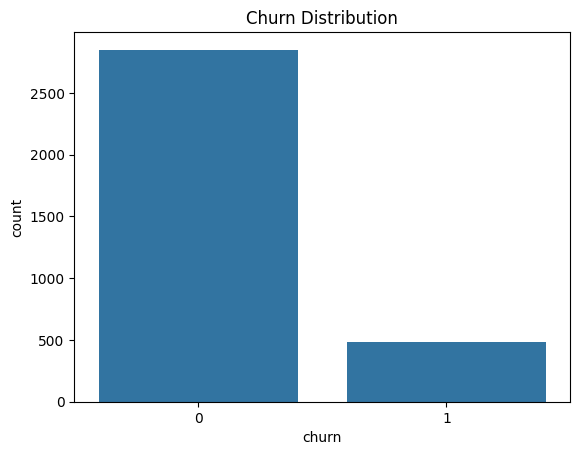

In [22]:
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


Visualizes how many customers churned vs not churned.
Helps detect class imbalance (important for model evaluation)

6. Feature and Target Selection

In [23]:
X = df.drop("churn", axis=1)
y = df["churn"]


X → Input features (independent variables).
y → Target variable (dependent variable = churn: 0 or 1).

7. Splitting the Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splits the data:
80% for training
20% for testing


8. Building the Model

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Builds a Random Forest model with 100 decision trees.
Trained on training data to learn patterns.

9. Making Predictions

Model predicts churn labels on unseen test data.

In [26]:
y_pred = model.predict(X_test)

10. Evaluating the Model

 Accuracy-
Shows overall correctness of predictions (percentage of correctly predicted churns).

 Confusion Matrix
Shows:
True Positives (TP)
True Negatives (TN)
False Positives (FP)
False Negatives (FN)

Classification Report
Includes:
Precision: % of predicted churns that were actually churn.
Recall: % of actual churns that were correctly predicted.
F1-Score: Harmonic mean of precision and recall.

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9430284857571214
Confusion Matrix:
 [[559   7]
 [ 31  70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



11. Feature Importance Visualization

Tells which features were most important in predicting churn.
Helps in:
Business insight
Feature selection
Model interpretation

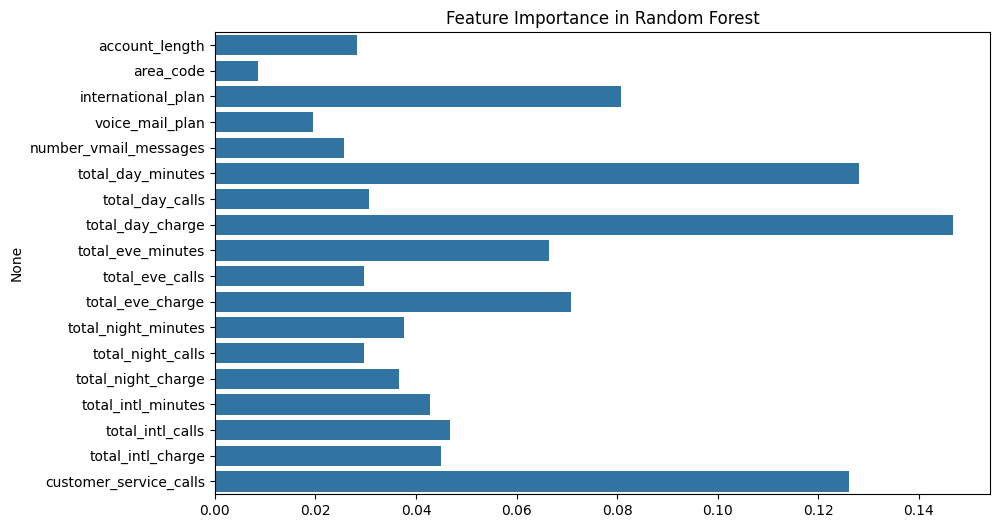

In [28]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.show()
